## Project Assignment #2

In this project assignment, we will get exposed to 'Empirical Cumulative Distribution Function' (i.e. ECDF)

One of the drawbacks of Bee Swarm plots is that if you have a lot of data, then the plot can get quite cluttered. Therefore when working with large data sets, it is better to leverage the ECDF plot since it provides a complete picture into the distribution of the data. 

**Ask #1**

The first ask in this assignment is to plot the ECDF depicting the age distribution for the city of NEW HAVEN. Utilize the same dataset that you utilized in Coding Challenge #1 (i.e. "Accidental Drug Related Deaths 2012-2017 (State of Connecticut)" data set available from the Data.Gov website)

https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation

What insights can you glean regarding the distribution of data?

**Key Takeaway:** When examining the distribution of data, a good rule of thumb is to plot the ECDF first

**Ask #2**

Compare the ECDF to percentiles. Recall that you computed the 25th, 50th and 75th percentiles using the Box Plot

**Hint**: **1)** First plot the ECDF and then overlay the ECDF with markers (i.e. Diamonds) depicting the 25th, 50th and 75th percentiles, **2)** Ensure that the Y-axis of the ECDF plot remains between 0 and 1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

In [0]:
data = pd.read_csv('https://data.ct.gov/api/views/rybz-nyjw/rows.csv')

In [4]:
data.head()

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,14-9876,06/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"CT\n(41.544654, -72.651713)"
1,12-16897,11/30/2012,Male,White,45.0,NaN,NaN,NaN,NEW HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
2,13-11849,08/12/2013,Male,White,30.0,NEW HAVEN,NaN,NaN,NEW HAVEN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,14-17578,11/23/2014,Male,White,27.0,NAUGATUCK,NaN,NaN,NEW MILFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW MILFORD, CT\n(41.576633, -73.408713)"
4,12-11497,08/14/2012,Male,White,21.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"


## ECDF

In [29]:
newhaven_data = data[['Age']][data['Residence City']=='NEW HAVEN']
print(newhaven_data.isnull().any())

Age    False
dtype: bool


In [0]:
newhaven_ecdf = ECDF(newhaven_data.as_matrix().flatten())

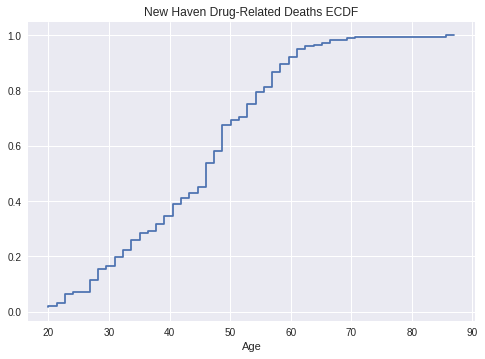

In [43]:
x = np.linspace(newhaven_data.min(), newhaven_data.max())
y = newhaven_ecdf(x)

fig = plt.figure()
ax = plt.subplot()
ax.step(x, y)
ax.set(title="New Haven Drug-Related Deaths ECDF", xlabel='Age');

The relationship between the ECDF and the distribution of the data is that where the ECDF is steeper, the data will be more tightly distributed around that point. In other words, the probability distribution function will take on a higher value.

In fact, the probability distribution function is the derivative of the cumulative distribution function, so this relationship becomes exact as the empirical CDF better approximates the true underlying CDF, if one exists.

Examining the ECDF for the age of those involved in drug-related deaths in New Haven, we observe that it is steeper around the middle of the domain of the data, and tapers off after age 60. We can see how this translates into the distribution of the data by making another plot.

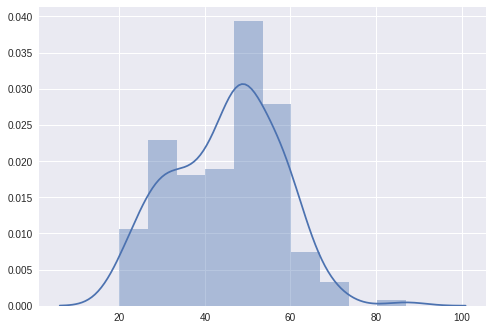

In [47]:
sns.distplot(newhaven_data);

## Quartiles

In [52]:
quartiles = newhaven_data.describe().loc[['25%', '50%', '75%']]
quartiles

,Age
25%,35.0
50%,47.0
75%,54.0


In [55]:
for q in quartiles['Age']:
    print(q)

35.0
47.0
54.0


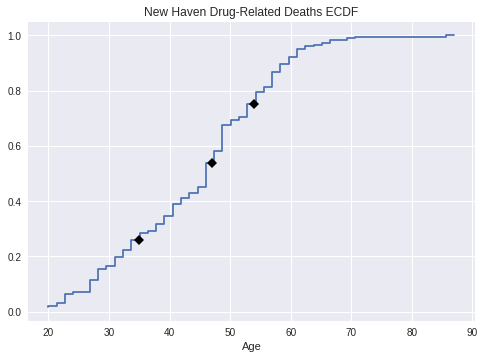

In [59]:
fig = plt.figure()
ax = plt.subplot()
ax.step(x, y)

for q in quartiles['Age']:
    qy = newhaven_ecdf(q)
    ax.plot(q, qy, 'kD')

ax.set(title="New Haven Drug-Related Deaths ECDF", xlabel='Age');

The quartiles, and more generally any percentile, of the data will have the value of the ECDF at its point be nearly precisely the proportion it denotes. This is expected, given the definition of a percentile: the data value below which a given percent of the data is contained. This corresponds exactly to the definition of a cumulative distribution function: the proportion of data contained below some data value, as a function of the values. Any discrepancy between the numerical label of a percentile and the output of an ECDF as a function of that percentile is due to the empirical nature of the ECDF, and the finite amount of data used to calculate it.